# Datatime index

In [2]:
from datetime import datetime

In [3]:
my_year = 2020
my_month = 1
my_day = 2
my_hour = 13
my_minute = 30
my_second = 15

In [4]:
#create datetime object

my_date = datetime(my_year, my_month, my_day)

In [5]:
my_date

datetime.datetime(2020, 1, 2, 0, 0)

In [6]:
my_date_time = datetime(my_year, my_month, my_day, my_hour, my_minute, my_second)

In [7]:
my_date_time

datetime.datetime(2020, 1, 2, 13, 30, 15)

In [8]:
my_date_time.day

2

In [9]:
import numpy as np

In [10]:
# Importance of dtype

np.array(['2020-03-15', '2020-05-24', '2020-08-09'], dtype='datetime64')

array(['2020-03-15', '2020-05-24', '2020-08-09'], dtype='datetime64[D]')

In [11]:
np.array(['2020-03-15', '2020-05-24', '2020-08-09'], dtype='datetime64[h]')

array(['2020-03-15T00', '2020-05-24T00', '2020-08-09T00'],
      dtype='datetime64[h]')

In [12]:
np.arange('2018-06-01', '2018-06-23', 7, dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [13]:
import pandas as pd

In [14]:
pd.date_range('2020-01-01', periods=7, freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [15]:
pd.date_range('Jan 1, 2020', periods=7, freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

# How to format specific date

In [18]:
pd.to_datetime(['1/2/2014', '1/3/2020'])

DatetimeIndex(['2014-01-02', '2020-01-03'], dtype='datetime64[ns]', freq=None)

In [19]:
pd.to_datetime(['1/2/2014', '1/3/2020'], format='%d/%m/%Y')

DatetimeIndex(['2014-02-01', '2020-03-01'], dtype='datetime64[ns]', freq=None)

In [21]:
data = np.random.randn(3,2)
cols=['A', 'B']
data

array([[-0.42316336,  0.54693818],
       [ 0.66287808, -0.48464926],
       [ 0.23966967, -1.04493617]])

In [23]:

idx = pd.date_range('2020-01-01', periods=3, freq='D')

df = pd.DataFrame(data, index=idx,columns=cols)

In [24]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [25]:
df.index.max()

Timestamp('2020-01-03 00:00:00', freq='D')

In [26]:
df.index.argmax()

2

# Time resampling

In [34]:
df = pd.read_csv('C:/Users/natas/Downloads/UDEMY_TSA_FINAL/UDEMY_TSA_FINAL/Data/starbucks.csv', index_col='Date', parse_dates=True)

In [35]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1006 non-null   float64
 1   Volume  1006 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.6+ KB


In [36]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

This is actually string. So to get datetime object simply pass parse_dates=True in pd.read_csv

# Resample data

In [37]:
# daily ----> yearly

df.resample(rule='A')

In [38]:
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


# Custom resampling functions

In [39]:
def first_day(entry):
    
    
    # Is there an entry
    if len(entry)!= 0:
        return entry[0]
        

In [40]:
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [41]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


<AxesSubplot:xlabel='Date'>

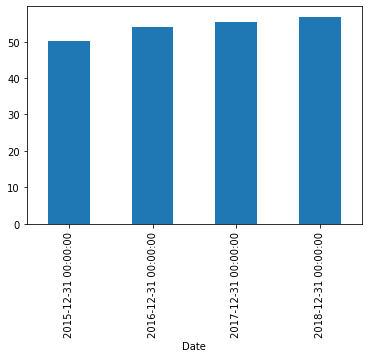

In [43]:
df['Close'].resample('A').mean().plot.bar()

<AxesSubplot:xlabel='Date'>

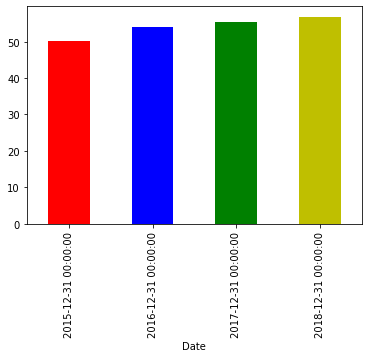

In [46]:
c = ['r', 'b', 'g', 'y']
df['Close'].resample('A').mean().plot.bar(color = c)

# Time shifting

In [47]:
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


In [48]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [49]:
df.shift(1)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
...,...,...
2018-12-24,61.3900,23524888.0
2018-12-26,60.5600,6323252.0
2018-12-27,63.0800,16646238.0


In [50]:
df.shift(periods=1, freq='M')

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548
...,...,...
2018-12-31,60.5600,6323252
2018-12-31,63.0800,16646238
2018-12-31,63.2000,11308081


# Rolling and expanding

<AxesSubplot:xlabel='Date'>

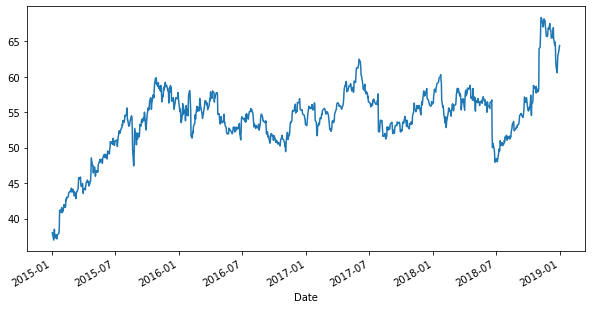

In [51]:
df['Close'].plot(figsize=(10,5))

# Rolling mean

In [52]:
df.rolling(window=7).mean()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
...,...,...
2018-12-24,63.270000,1.528625e+07
2018-12-26,62.947143,1.525942e+07
2018-12-27,62.765714,1.471157e+07


<AxesSubplot:xlabel='Date'>

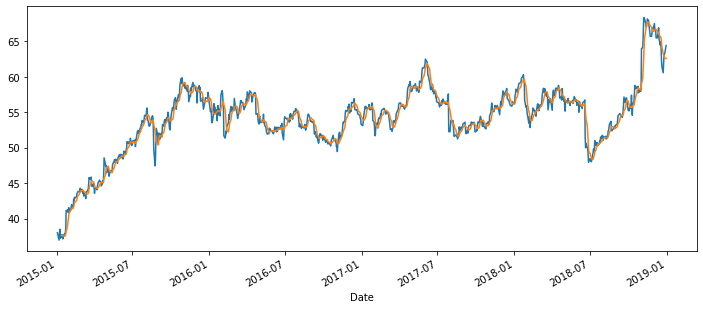

In [53]:
df['Close'].plot(figsize=(12,5))
df.rolling(window=7).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

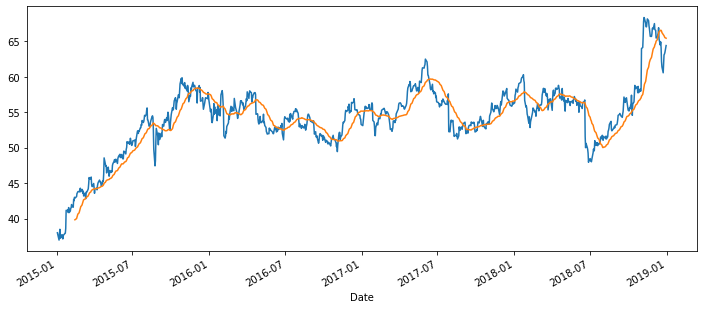

In [54]:
df['Close'].plot(figsize=(12,5))
df.rolling(window=30).mean()['Close'].plot()

In [55]:
df['Close_30day_mean']=df['Close'].rolling(window=30).mean()

<AxesSubplot:xlabel='Date'>

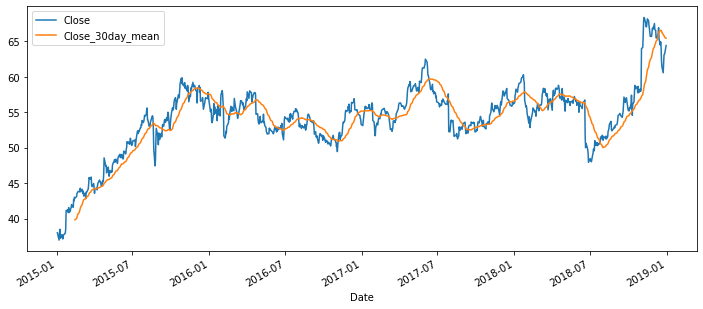

In [57]:
df[['Close', 'Close_30day_mean']].plot(figsize=(12,5))   # Trick to add legend

<AxesSubplot:xlabel='Date'>

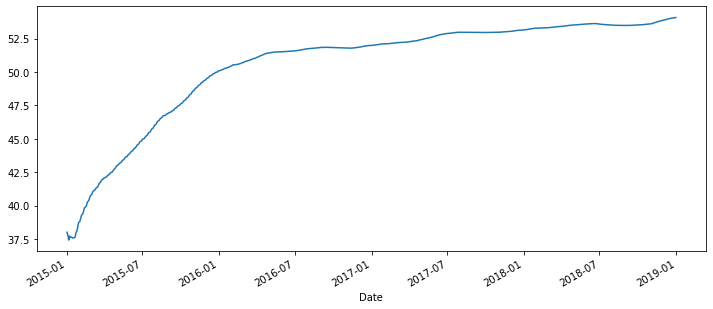

In [58]:
df['Close'].expanding().mean().plot(figsize=(12,5))

# Visualizing time series data

<AxesSubplot:xlabel='Date'>

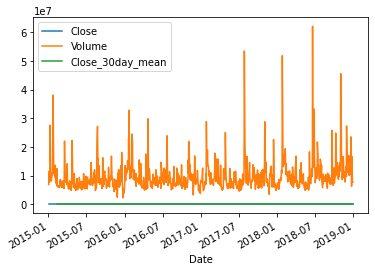

In [59]:
df.plot()

<AxesSubplot:xlabel='Date'>

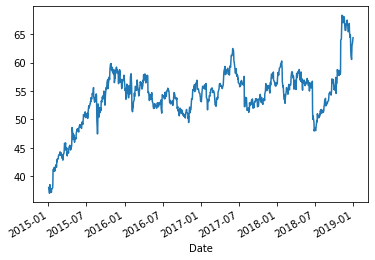

In [60]:
df['Close'].plot()

In [61]:
title = 'STOCK PRICES'
ylabel = 'PRICES'
xlabel = 'DATE'

[Text(0.5, 0, 'DATE'), Text(0, 0.5, 'PRICES')]

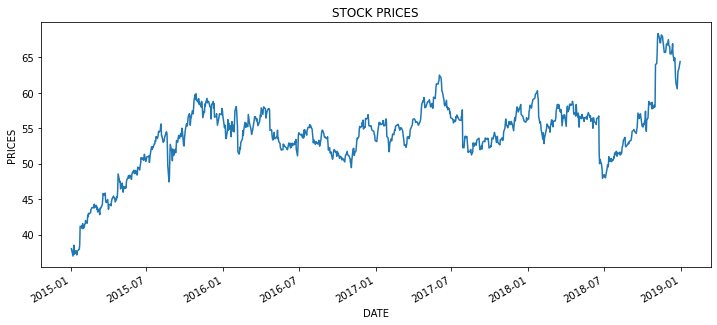

In [63]:
ax = df['Close'].plot(figsize=(12,5), title=title)
ax.set(xlabel=xlabel, ylabel=ylabel)

# How to autoscale the axes

[Text(0.5, 0, 'DATE'), Text(0, 0.5, 'PRICES')]

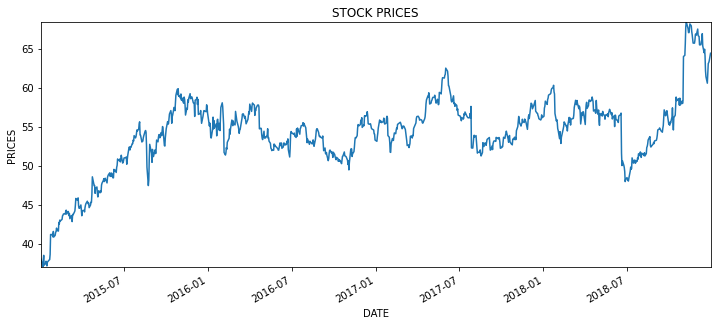

In [64]:
ax = df['Close'].plot(figsize=(12,5), title=title)
ax.autoscale(tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

<AxesSubplot:xlabel='Date'>

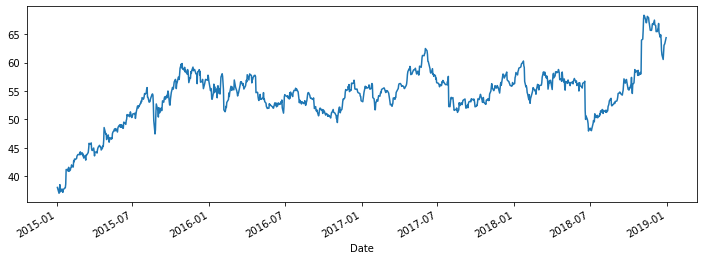

In [65]:
df['Close'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

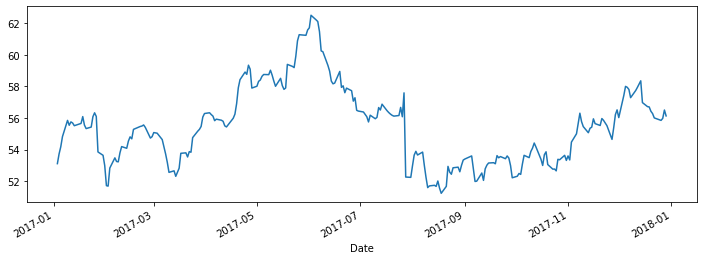

In [66]:
# But if I want only 2017
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,4))  # First option

<AxesSubplot:xlabel='Date'>

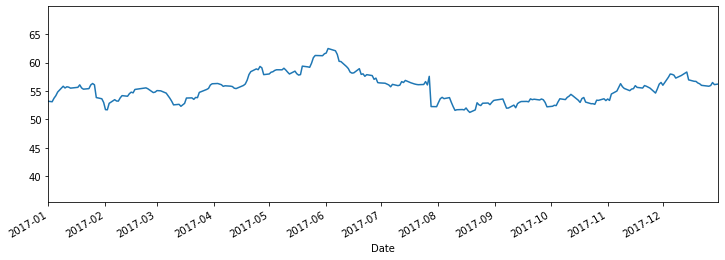

In [67]:
df['Close'].plot(figsize=(12,4), xlim=['2017-01-01','2017-12-31'])  # Second options

There is the difference because my call in plot() of xlim causes the autoscaling

<AxesSubplot:xlabel='Date'>

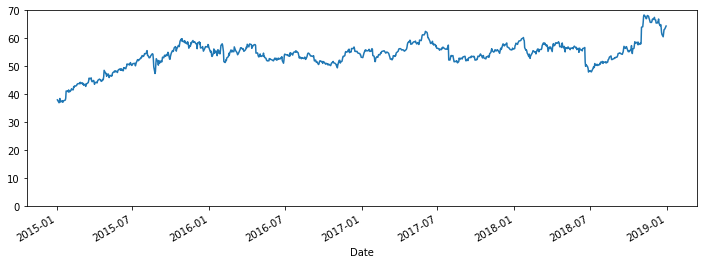

In [69]:
df['Close'].plot(figsize=(12,4), ylim=[0, 70])

In [70]:
from matplotlib import dates

# Xticks limits

<AxesSubplot:xlabel='Date'>

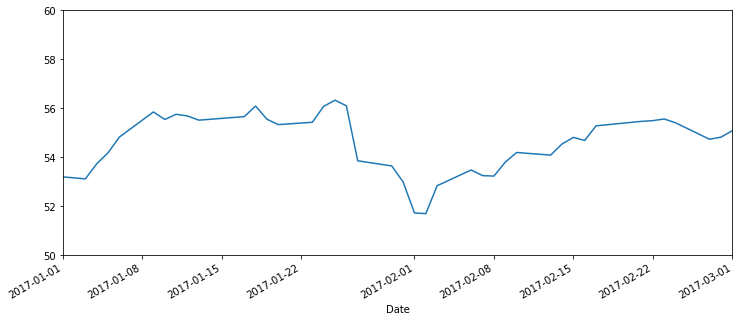

In [72]:
df['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60], figsize=(12,5))

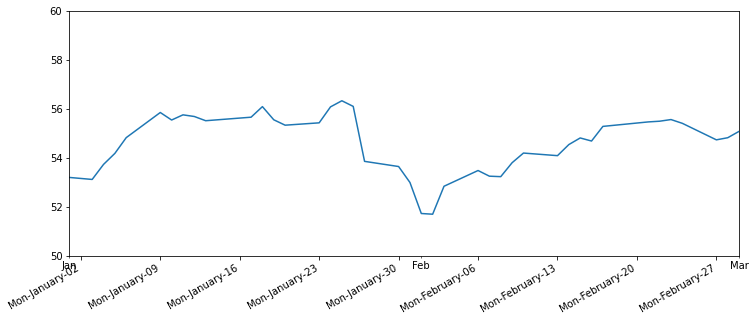

In [82]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60], figsize=(12,5))
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%a-%B-%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

# https://matplotlib.org/stable/api/dates_api.html

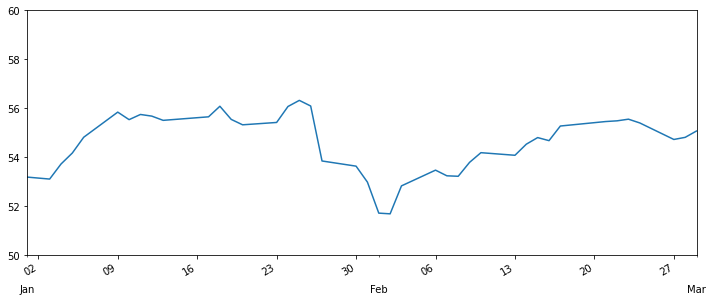

In [84]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60], figsize=(12,5))
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

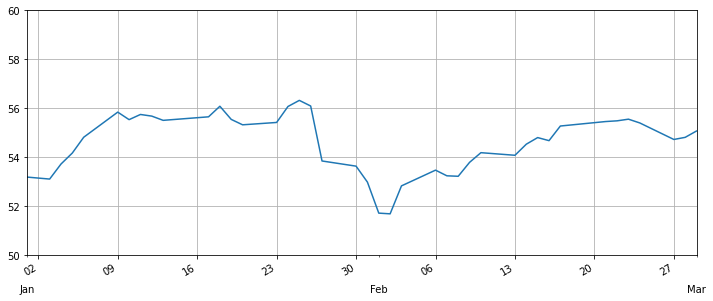

In [86]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60], figsize=(12,5))
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.xaxis.grid(True)
ax.yaxis.grid(True)